# MULTILAYER PERCEPTRON

Multilayer Perceptron adalah salah satu jenis implementasi dari Neural Network. Oleh karena itu, untuk lebih memahami intuisi dari Multilayer Perceptron, kira harus mempelajari lebih dalam tentang Neural Network.

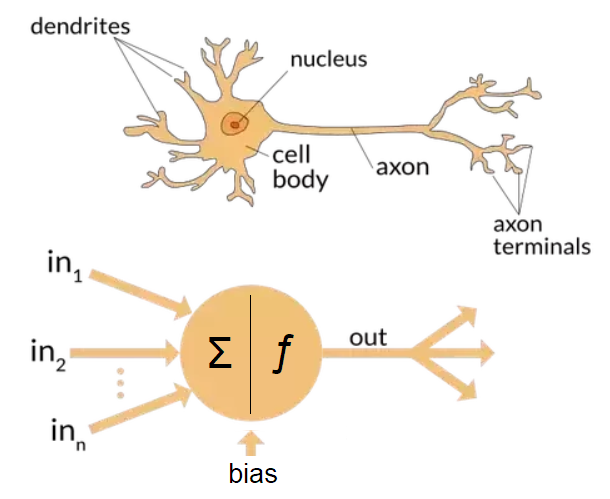

Neural Network adalah model yang dikomputasi berdasarkan cara kerja otak manusia. Pada umumnya dalam membuat sebuah keputusan/respon, pertama-tama manusia menerima sinyal dari dendrit, diolah di cell body atau neuron, dan kemudian dikirimkan ke axon saat sinyal sudah cukup diterima. Sinyal yang menjadi output ini kemudian akan menjadi input dalam neuron berikutnya, dan seterusnya. Dalam proses tersebut, neuron terakhir akan membuat keputusan tentang pentingnya sebuah input dari beberapa neuron berdasarkan dari sinyal-sinyal yang diterima. Berdasarkan proses tersebut kita mampu mengaplikasikan model yang simple, yang dinamakan Singlelayer Perceptron






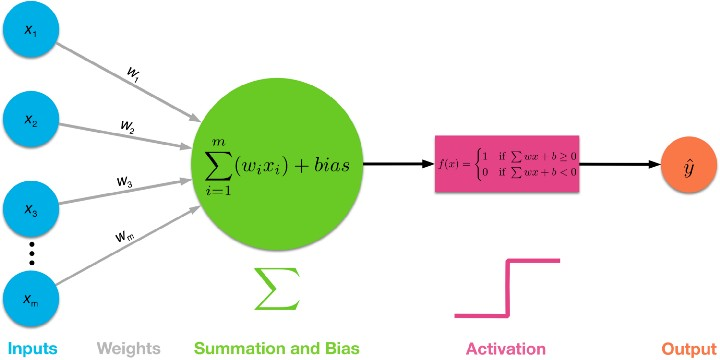

Berdasarkan gambar diatas, tiap-tiap fitur mempunyai bobot. Bobot ini menunjukkan seberapa pentingnya sebuah fitur dalam menentukan sebuah keputusan. Hasil komputasi dari beberapa fitur tersebut akan diakumulasikan, dan dimasukkan ke fungsi aktivasi. Fungsi aktivasi dalam Neural Network ini bisa berupa logistic function, tanh, atau apapun yang bersifat sigmoid.

Teori ini telah ditemukan pada tahun 1950 dan 1960-an. Namun, teori ini tidak bisa diterapkan secara efektif untuk masalah non-linear. Selain itu, bobot pada Singlelayer Perceptron ini tidak dapat diimprovisasi untuk meningkatkan kualitas model. Hal-hal ini yang menyebabkan orang-orang menjadi tidak tertarik dengan perceptron.

Pada tahun 1986, Geoffrey Hinton, David Rumerhart, dan Ronald Williams menunjukkan cara untuk mengatasi masalah-masalah tersebut dalam paper berjudul "Learning representations by back-propagating errors". Paper ini berfokus pada 2 hal, yaitu:
1. Backpropagation, yaitu prosedur untuk mengatur kembali bobot-bobot untuk mengurangi error antara prediksi dan data aktual
2. Hidden Layers, yaitu node/simpul yang terletak diantara input layer dan output layer, yang berfungsi untuk melakukan komputasi yang kompleks pada sebuah model. 



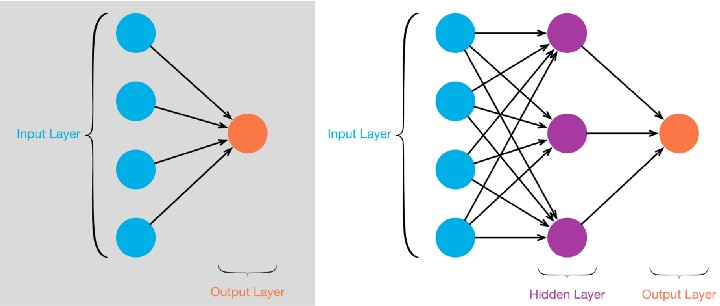

Backpropagation adalah proses yang berguna supaya jaringan bisa belajar dari tingkat error antara prediksi dan aktual. Tingkat error yang didapat ini akan menjadi sinyal untuk dikirimkan ke node awal, agar bobot-bobot pada setiap node bisa disesuaikan kembali. Proses ini akan membuat tingkat error antara prediksi dan aktual semakin kecil, setiap kita menjalankan backpropagation.


Kemudian pada hidden layer, hidden layer ini yang membuat singlelayer perceptron ini menjadi multilayer perceptron. hidden layer ini yang nantinya akan mengatasi masalah non-linear dengan cara melakukan komputasi yang kompleks pada model.

## Activation Function


Fungsi Aktivasi adalah fungsi yang terletak diantara 2 buah neuron. Fungsi Aktivasi  dikenal juga sebagai Fungsi Transfer.
Fungsi ini bertugas untuk menentukan seberapa besar nilai output pada sebuah neuron. Nilai ini nantinya akan dipetakan sebagai nilai input pada neuron berikutnya.

Nilai output sebelum memasuki fungsi aktivasi adalah sebagai berikut.

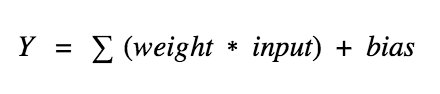

### Linear Function

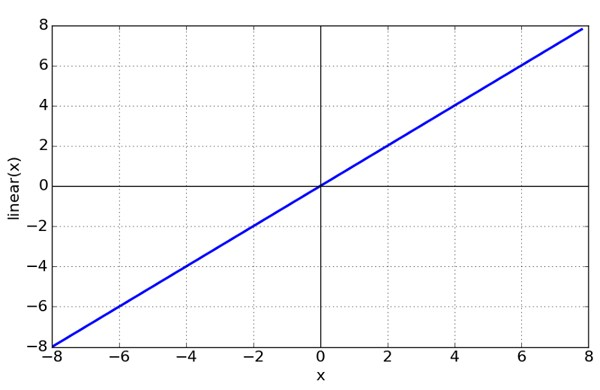

Fungsi diatas adalah fungsi aktivasi yang paling sederhana. Karena hanya menyimpulkan dari hasil pertambahan beberapa output neuron. Kelemahan dari fungsi ini adalah tidak mampu mempelajari masalah non-linear, karena jika semua hidden layer mempunyai fungsi aktivasi linear, maka hasil dari output layer pasti mempunyai fungsi linear pula.

Sebaliknya, fungsi aktivasi linear mampu diimplementasikan pada output layer, jika kita menginginkan model neural network menangani masalah regresi.

### ReLU Function

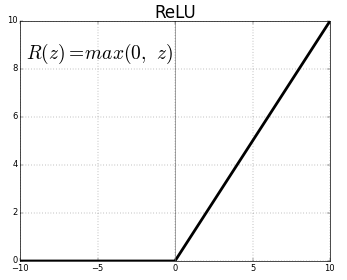

ReLU function adalah fungsi yang paling sering digunakan di dunia saat ini. Fungsi ini umumnya diimplementasikan pada hidden layer. Sekilas ReLU mirip seperti fungsi linear, tapi sebenarnya ReLU mempunyai sifat non-linear. ReLU bekerja sebagai tuas/lever di saat output dari neuron melewati treshold tertentu.

Selain itu, bayangkan apabila pada sebuah model neural network terdiri dari ratusan neuron. Fungsi aktivasi ReLU akan mempersingkat waktu training pada model. Hal ini dikarenakan beberapa neuron mempunyai nilai 0 dan hanya memproses beberapa neuron yang mempunyai pengaruh signifikan dalam memprediksi sebuah output. 

Sekarang kita beralih pada fungsi-fungsi aktivasi yang dapat diimplementasikan pada output layer.

### Step Function

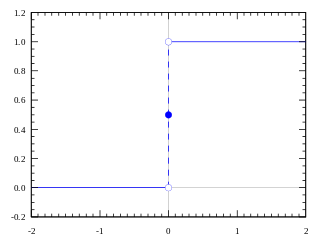

Fungsi aktivasi ini adalah fungsi yang paling dasar untuk menentukan sebuah nilai pada output layer. Berdasarkan gambar diatas, nilai output akan bernilai 0 jika input lebih kecil dari 0, dan akan bernilai 1 jika input lebih besar dari 0. Hal sesederhana ini dapat membuat Step function menjadi fungsi aktivasi yang cocok untuk model klasifikasi.

Namun Step Function mempunyai permasalahan yang sangat krusial disini. Seperti yang kita ketahui, backpropagation adalah proses yang berguna supaya jaringan bisa belajar dari tingkat error antara prediksi dan aktual. Jika model hanya belajar berdasarkan nilai output 0 dan 1, maka model tidak akan berkembang secara maksimal. Model membutuhkan bahan pembelajaran yang lebih dari sekedar dari angka biner, contohnya adalah probabilitas yang bersifat kontinyu.

Berikut ini adalah fungsi aktivasi yang umum digunakan pada output layer.

### Sigmoid Function

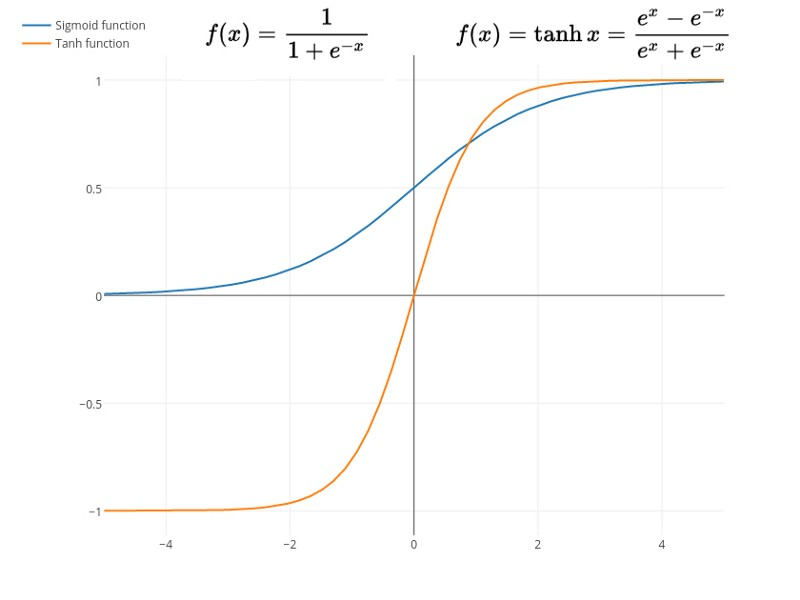

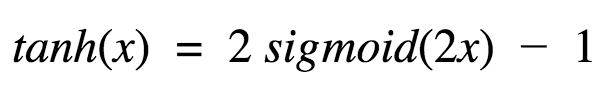

Logistic function dan tanh function adalah jawaban untuk mengatasi masalah pada output layer. Keduanya mempunyai nilai keluaran yang kontinyu yang mewakili nilai probabilitas. Perbedaannya fungsi tanh adalah fungsi logistik yang sudah diskalakan dari range antara -1 sampai 1. Keduanya sama-sama fungsi yang paling sering digunakan sampai hari ini untuk diimplementasikan pada output layer.

## CODING SECTION

In [15]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [16]:

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

Proses encoding pada categorical data harus dilakukan karena Neural Network hanya mampu membaca angka sebagai input

In [17]:
# encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:


# Importing the Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

#membuat ANN
classifier = Sequential()

# Menambah input layer dan hidden layer pertama
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Menambah hidden layer kedua
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Menambahkan output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Menyusun ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
8000/8000 [==============================] - 2s 296us/step - loss: 0.4918 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4296 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.4254 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 181us/step - loss: 0.4209 - acc: 0.8081
Epoch 5/100
8000/8000 [==============================] - 1s 175us/step - loss: 0.4179 - acc: 0.8237 1s -
Epoch 6/100
8000/8000 [==============================] - 1s 186us/step - loss: 0.4161 - acc: 0.8260
Epoch 7/100
8000/8000 [==============================] - 1s 180us/step - loss: 0.4143 - acc: 0.8276
Epoch 8/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.4130 - acc: 0.8300
Epoch 9/100
8000/8000 [==============================] - 1s 184us/step - loss: 0.4119 - acc: 0.8314
Epoch 10/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.4110 - acc: 0

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [26]:
cm


array([[1543,   52],
       [ 263,  142]], dtype=int64)

In [27]:
acc

0.8425

## KESIMPULAN

MLP adalah salah satu cara untuk mengatasi masalah klasifikasi. MLP mempunyai kelebihan untuk mampu mempelajari struktur data tanpa perlu kita kontrol secara berlebih. Namun, Machine Learning bisa mampu lebih unggul terhadap Deep Learning apabila kita mengetahui domain/basic knowledge terhadap data yang akan kita olah.